# Case Study: Modeling Car Insurance Claims

### Tasks
- Identify the single feature of the data that is the best predictor of whether a customer will put in a claim (the `outcome` column), excluding the `id` column.
- Store as a DataFrame called `best_feature_df`, containing columns named `best_feature` and `best_accuracy` with the name of the feature with the highest accuracy, and the respective accuracy score.

In [250]:
import pandas as pd
import numpy as np 
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
car_insurance = pd.read_csv('../Data/car_insurance.csv')
car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [252]:
car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [268]:
# Imputation for 'annual_mileage' and 'credit_score' using median values
car_insurance['annual_mileage'] = car_insurance['annual_mileage'].fillna(
    car_insurance['annual_mileage'].median()
)
car_insurance['credit_score'] = car_insurance['credit_score'].fillna(
    car_insurance['credit_score'].median()
)

In [254]:
car_insurance.dtypes

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

In [255]:
predictors_list = [
    'age',
    'gender',
    'credit_score',
    'vehicle_ownership',
    'children',
    'annual_mileage',
    'vehicle_type',
    'speeding_violations',
    'duis',
    'past_accidents',
    'driving_experience'
]

len(predictors_list)

11

In [256]:
#for col in predictors_list:
   #car_insurance[col] = pd.to_numeric(car_insurance[col], errors='coerce')


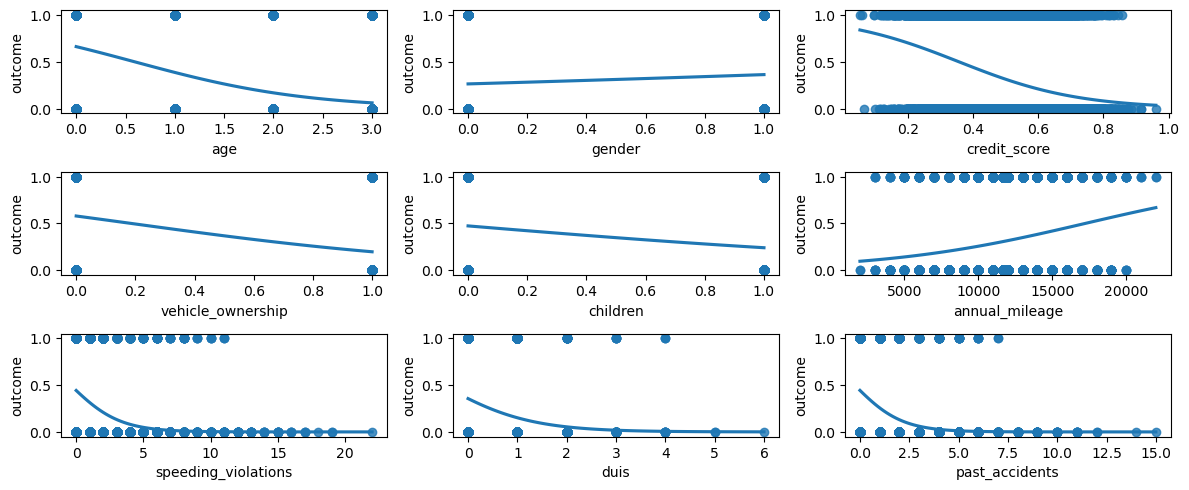

In [257]:
fig, ax = plt.subplots(3, 3, figsize=(12, 5))
ax = ax.flatten()   # Flattening allows 1D indexing for n-dimensional ax array

plt_predict = predictors_list.copy()
plt_predict.remove('vehicle_type')
plt_predict.remove('driving_experience')

for i, pred in enumerate(plt_predict):
    sns.regplot(
        x=pred,
        y='outcome',
        data=car_insurance,
        logistic=True,
        ci=None,
        ax=ax[i]
    )

plt.tight_layout()
plt.show()

In [258]:
print(predictors_list)
len(predictors_list)

['age', 'gender', 'credit_score', 'vehicle_ownership', 'children', 'annual_mileage', 'vehicle_type', 'speeding_violations', 'duis', 'past_accidents', 'driving_experience']


11

In [259]:
age_mdl = logit('outcome ~ age', data=car_insurance).fit()
gender_mdl = logit('outcome ~ gender', data=car_insurance).fit()
credit_mdl = logit('outcome ~ credit_score', data=car_insurance).fit()
owner_mdl = logit('outcome ~ vehicle_ownership', data=car_insurance).fit()
n_child_mdl = logit('outcome ~ children', data=car_insurance).fit()
vtype_mdl = logit('outcome ~ vehicle_type', data=car_insurance).fit()
spd_mdl = logit('outcome ~ speeding_violations', data=car_insurance).fit()
dui_mdl = logit('outcome ~ duis', data=car_insurance).fit()
accident_mdl = logit('outcome ~ past_accidents', data=car_insurance).fit()
mileage_mdl = logit('outcome ~ annual_mileage', data=car_insurance).fit()
experience_mdl = logit('outcome ~ driving_experience', data=car_insurance).fit()

mdl_list = [
    spd_mdl,
    dui_mdl,
    accident_mdl,
    mileage_mdl,
    age_mdl,
    gender_mdl,
    credit_mdl,
    owner_mdl,
    n_child_mdl,
    vtype_mdl,
    experience_mdl
]


Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.558922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.605716
  

In [260]:
actual_outcome = car_insurance['outcome']

mdl_pred_list = [np.round(mdl.predict()) for mdl in mdl_list]


for var, mdl in zip(predictors_list, mdl_pred_list):
    
    print(f'Confusion Matrix for {var}:\n')

    outcome_df = pd.DataFrame({
        'outcome_actual':actual_outcome,
        'outcome_predict': mdl
    })

    print(outcome_df.value_counts(sort=False))
    print('\n\n')



Confusion Matrix for age:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for gender:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for credit_score:

outcome_actual  outcome_predict
0.0             0.0                6867
1.0             0.0                3133
Name: count, dtype: int64



Confusion Matrix for vehicle_ownership:

outcome_actual  outcome_predict
0.0             0.0                6801
                1.0                  66
1.0             0.0                3030
                1.0                 103
Name: count, dtype: int64



Confusion Matrix for children:

outcome_actual  outcome_predict
0.0             0.0                6299
                1.0                 568
1.0             0.0                1685
                1.0                144

In [261]:
len(mdl_pred_list)

11

In [262]:
mdl_accuracies_dict = {}

for mdl, pred_name in zip(mdl_list, predictors_list):
    
    conf_matrix = mdl.pred_table()
    tn = conf_matrix[0, 0]
    fp = conf_matrix[0, 1]
    fn = conf_matrix[1, 0]
    tp = conf_matrix[1, 1]

    mdl_accuracy = round(( (tn + tp) / (tn + fp + fn + tp) ) * 100, 2)
    print(f'{pred_name} logit model accuracy : {mdl_accuracy} %')

    mdl_accuracies_dict[pred_name] = mdl_accuracy



age logit model accuracy : 68.67 %
gender logit model accuracy : 68.67 %
credit_score logit model accuracy : 68.67 %
vehicle_ownership logit model accuracy : 69.04 %
children logit model accuracy : 77.47 %
annual_mileage logit model accuracy : 68.67 %
vehicle_type logit model accuracy : 70.54 %
speeding_violations logit model accuracy : 73.51 %
duis logit model accuracy : 68.67 %
past_accidents logit model accuracy : 68.67 %
driving_experience logit model accuracy : 77.71 %


In [263]:
mdl_accuracies_dict

{'age': 68.67,
 'gender': 68.67,
 'credit_score': 68.67,
 'vehicle_ownership': 69.04,
 'children': 77.47,
 'annual_mileage': 68.67,
 'vehicle_type': 70.54,
 'speeding_violations': 73.51,
 'duis': 68.67,
 'past_accidents': 68.67,
 'driving_experience': 77.71}

In [264]:
max_key = max(mdl_accuracies_dict, key=mdl_accuracies_dict.get)
print(max_key)
print(max(mdl_accuracies_dict.values()))

driving_experience
77.71


In [272]:
best_feature_df = pd.DataFrame({
    'best_feature':['driving_experience'],
    'best_accuracy':[mdl_accuracies_dict.get('driving_experience')]
})

best_feature_df

,best_feature,best_accuracy
0,driving_experience,77.71
